In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
import ipyvuetify as v
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import resample
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from colorama import Fore, Back, Style

In [3]:
df=pd.read_csv("./churn.csv")


In [3]:
print(Style.BRIGHT+ 'Checking dfframe:' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)
df.head()

Checking Dataframe:
---------------------


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(Style.BRIGHT+ 'Dataframe information :' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)
df.info()

Dataframe information :
---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 

In [5]:
print(Style.BRIGHT+ 'Dataframe Dtypes:' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)

pd.value_counts(df.dtypes)

Dataframe Dtypes:
---------------------


object     18
int64       2
float64     1
dtype: int64

In [6]:
print(Style.BRIGHT+ 'Dataframe description:' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)

(df.describe())


Dataframe description:
---------------------


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df_types= df.dtypes
row1= df.iloc[1]
row2= df.iloc[2]
row3=df.iloc[3]

pd_df = pd.DataFrame({'Types': df_types,'row1': row1, 'row2': row2,'row3':row3})
pd_df

,Types,row1,row2,row3
customerID,object,5575-GNVDE,3668-QPYBK,7795-CFOCW
gender,object,Male,Male,Male
SeniorCitizen,int64,0,0,0
Partner,object,No,No,No
Dependents,object,No,No,No
tenure,int64,34,2,45
PhoneService,object,Yes,Yes,No
MultipleLines,object,No,No,No phone service
InternetService,object,DSL,DSL,DSL
OnlineSecurity,object,Yes,Yes,Yes


In [9]:
print(Style.BRIGHT+ 'Dataframe shape:' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)

(df.shape)

Dataframe shape:
---------------------


(7043, 21)

In [10]:
df.duplicated().sum()

0

In [11]:
print(Style.BRIGHT+ 'Dataframe null values:' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)

(df.isnull().sum())

Dataframe null values:
---------------------


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
print(Style.BRIGHT+ 'Dataframe Columns:' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)
df.columns

Dataframe Columns:
---------------------


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
import pandas_summary as ps
dfs = ps.DataFrameSummary(df)
print('categoricals: ', dfs.categoricals.tolist())
print('numerics: ', dfs.numerics.tolist())
dfs.summary()

categoricals:  ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'TotalCharges']
numerics:  ['tenure', 'MonthlyCharges']


C:\Users\Hemanth\AppData\Local\Temp\ipykernel_26516\992995788.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfs = ps.DataFrameSummary(df)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,NaN,NaN,7043.0,NaN,NaN,7043.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7043.0,NaN,NaN
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.25,NaN,NaN
25%,NaN,NaN,0.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.5,NaN,NaN
50%,NaN,NaN,0.0,NaN,NaN,29.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.35,NaN,NaN
75%,NaN,NaN,0.0,NaN,NaN,55.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.85,NaN,NaN
max,NaN,NaN,1.0,NaN,NaN,72.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118.75,NaN,NaN
counts,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
uniques,7043,2,2,2,2,73,2,3,3,3,...,3,3,3,3,3,2,4,1585,6531,2


In [14]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)
df['SeniorCitizen'].dtype

dtype('O')

In [15]:

df = df.loc[df["TotalCharges"] != " "]
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

C:\Users\Hemanth\AppData\Local\Temp\ipykernel_26516\3798276984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])


In [16]:

df_new = df.loc[(df["tenure"] <= 1) | (df['Churn']== "No")]

df = df.loc[df["tenure"] > 1]

In [21]:
df_new["Churn"].value_counts()

No     5163
Yes     380
Name: Churn, dtype: int64

In [27]:
df.nunique()

customerID          6419
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                71
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1571
TotalCharges        6199
Churn                  2
dtype: int64

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

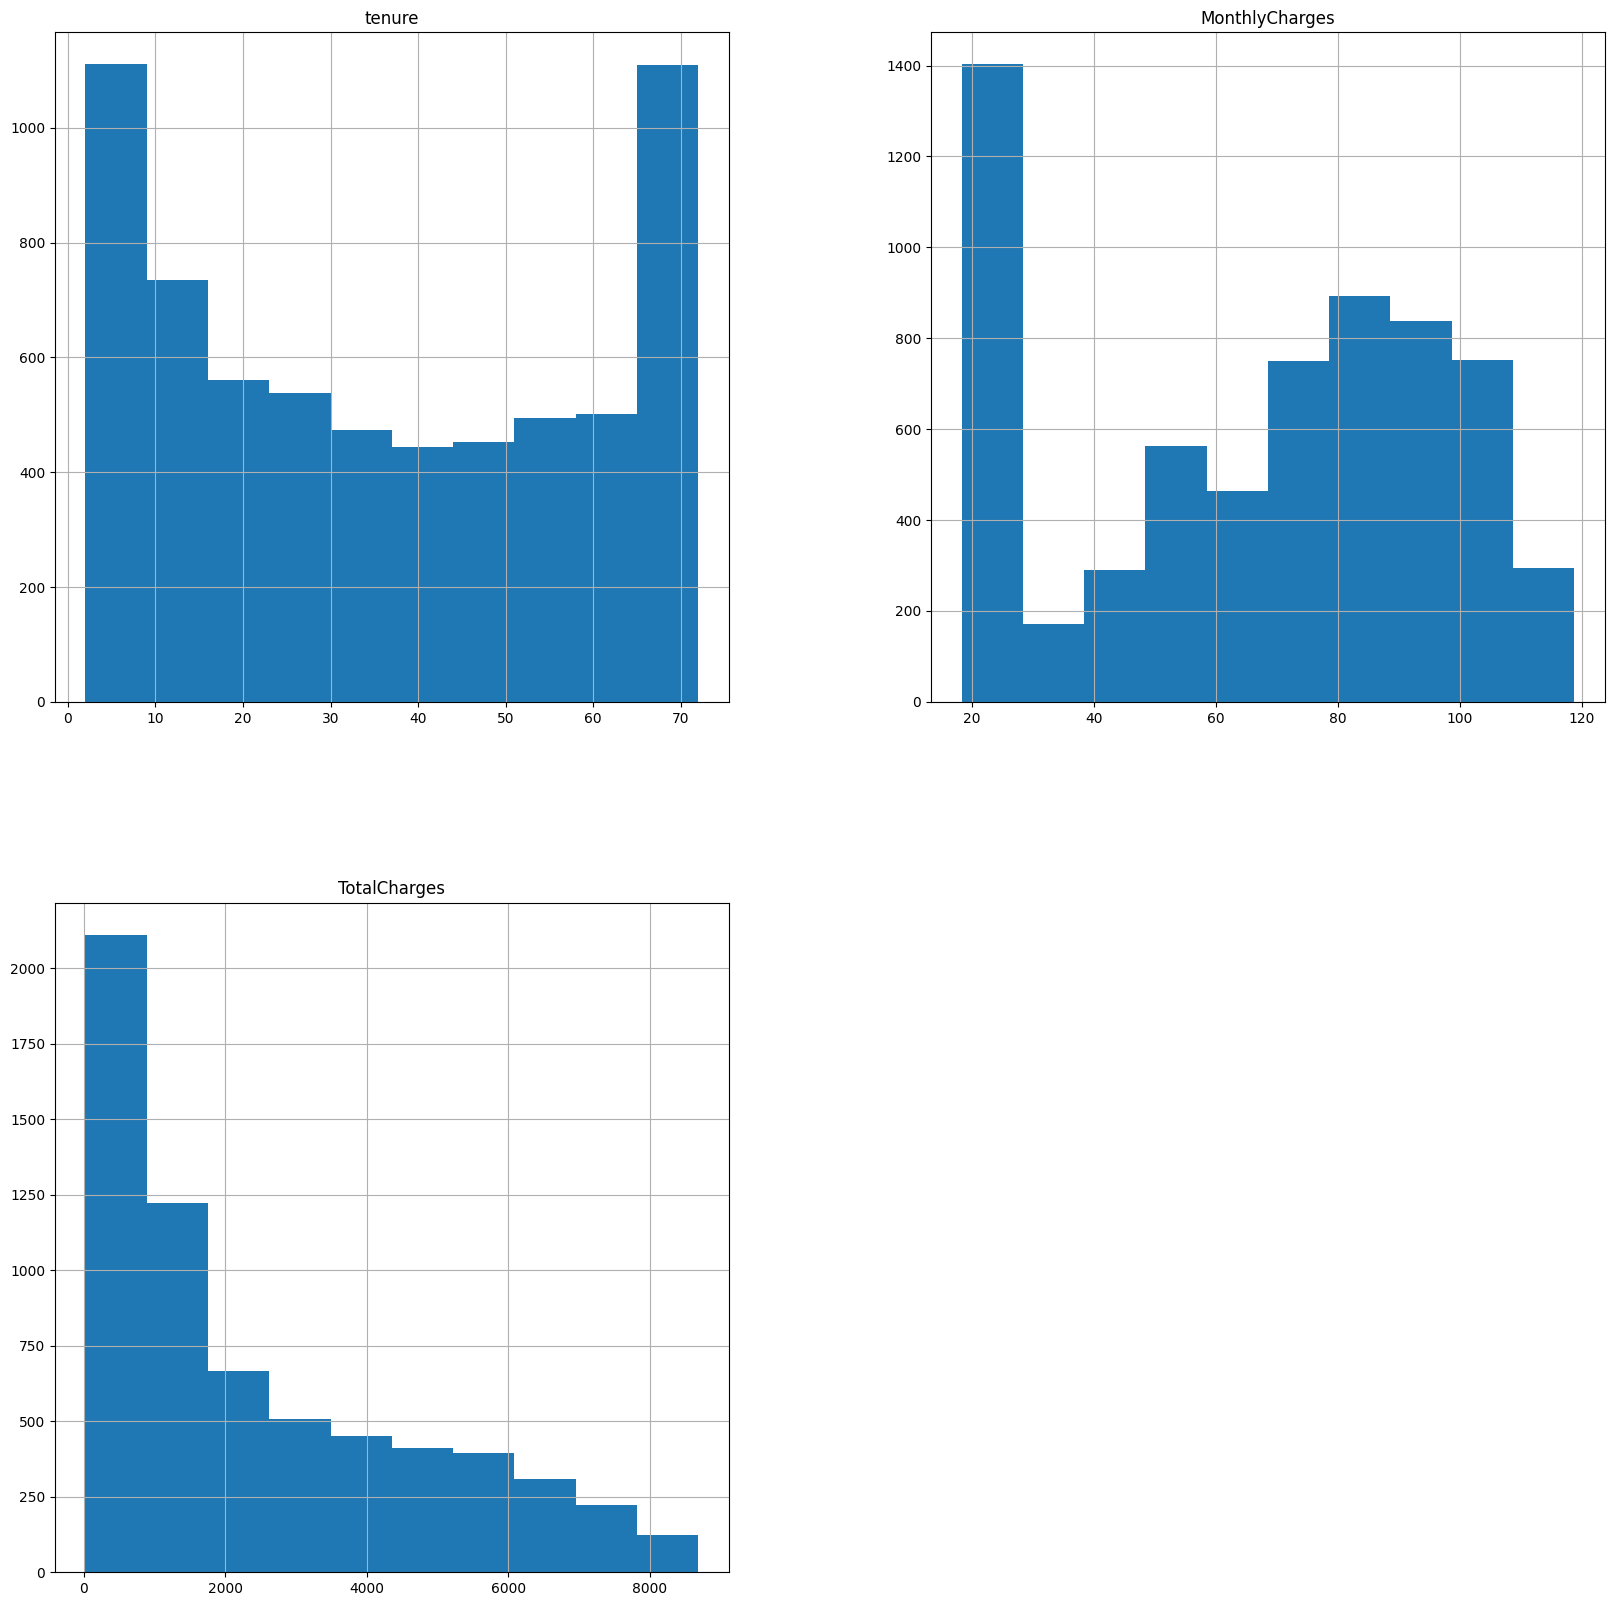

In [26]:
df.hist(figsize=(20,20))

<class 'str'>    6419
Name: Churn, dtype: int64


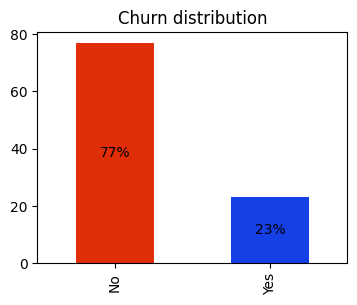

In [18]:
print(df['Churn'].apply(type).value_counts())
ax0=df['Churn'].value_counts(normalize=True).mul(100).round(1).plot(kind='bar',color=["#E02E08", "#1440E5"], title="Churn distribution",figsize=(4,3))
ax0.bar_label(ax0.containers[0],label_type="center",fmt='%.f%%')
plt.show()

In [25]:
def explore_variable (variable):
    print(variable)
    if df[variable].dtype == "object":
        print(df[variable].apply(type).value_counts())
        ############ dfs
        df1=df[variable].value_counts(normalize=True).mul(100).round(1)
        df2=pd.crosstab(df[variable],df['Churn'], normalize='index').mul(100).round(1)
        ############ plots
        fig,axes = plt.subplots(1, 2, figsize=(8,3))
        ax1=df1.plot(kind='bar', color=["#38EF0B", "#E02E08"], title=f"{variable} distribution", ax=axes[0]) # here color by bar
        ax1.bar_label(ax1.containers[0],label_type="center",fmt='%.f%%') 
        ax2=df2.plot(kind='bar', stacked=True, color=["#1b7df5", "#f51d82"],title=f"Churn distribution by {variable}", ax=axes[1]) # here color by subgroup
        ax2.legend(bbox_to_anchor=(1.0, 1.0))
        for c in ax2.containers:
            ax2.bar_label(c, label_type="center",fmt='%.f%%')

        plt.show()

    else:
        fig, axes = plt.subplots(1, 3, figsize=(11,3))
        sns.histplot(data=df, x=variable, kde=True, color="#E02E08", ax=axes[0]).set_title(f"{variable} distribution - histogram")
        sns.ecdfplot(data=df, x=variable, hue= 'Churn', palette=["#1b7df5", "#f51d82"], ax=axes[1]).set_title(f"{variable} distribution - ecdf plots")
        sns.violinplot(data=df, x='Churn', y=variable, palette=["#1b7df5", "#f51d82"], ax=axes[2]).set_title(f"{variable} distribution by Churn")
        plt.show()


gender
<class 'str'>    6419
Name: gender, dtype: int64


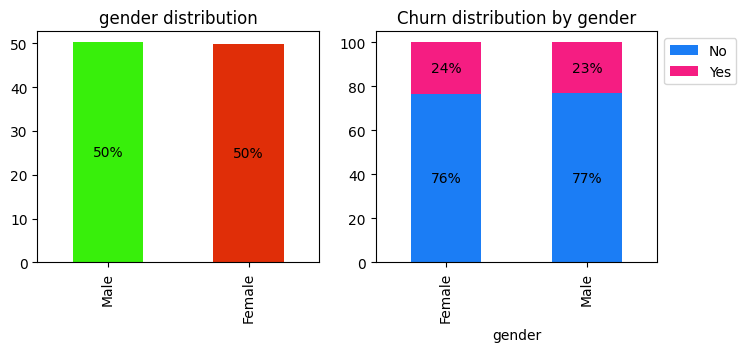

In [26]:
explore_variable(list(df.columns)[1])

SeniorCitizen
<class 'str'>    6419
Name: SeniorCitizen, dtype: int64


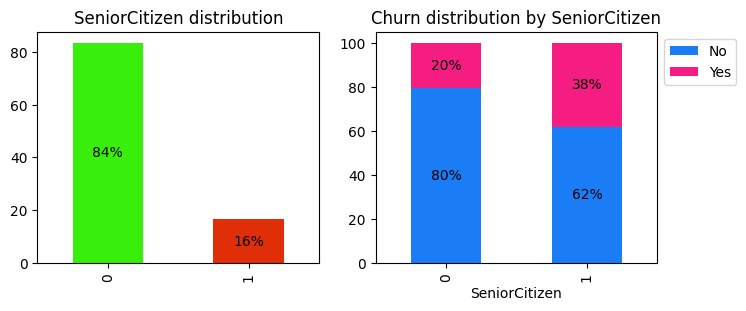

In [27]:
explore_variable(list(df.columns)[2])

Partner
<class 'str'>    6419
Name: Partner, dtype: int64


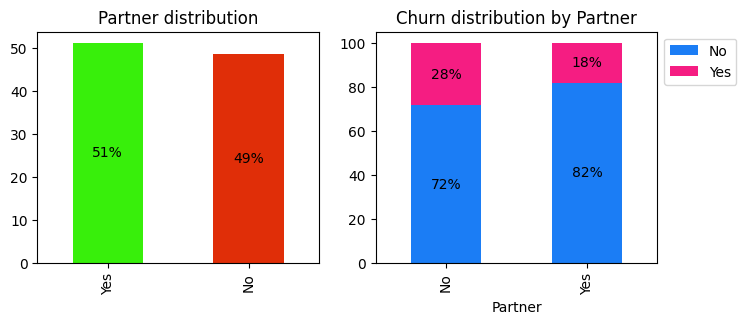

In [28]:
explore_variable(list(df.columns)[3])

Dependents
<class 'str'>    6419
Name: Dependents, dtype: int64


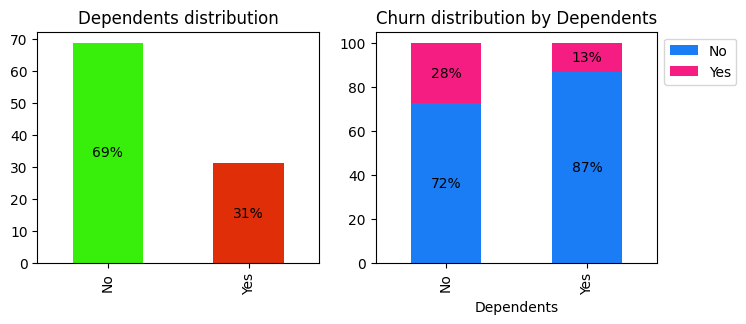

In [29]:
explore_variable(list(df.columns)[4])

tenure


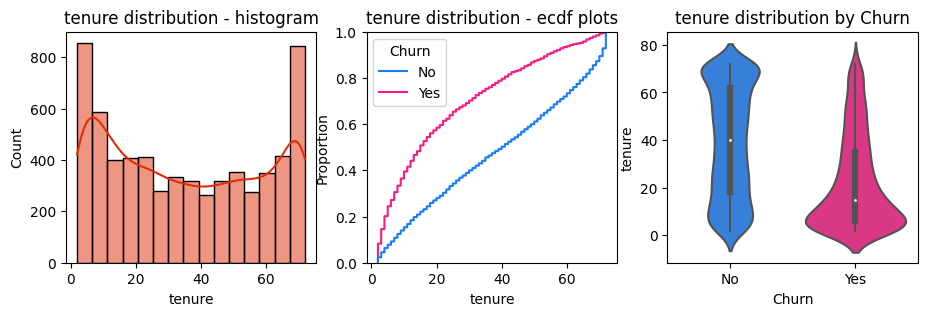

In [30]:
explore_variable(list(df.columns)[5])

PhoneService
<class 'str'>    6419
Name: PhoneService, dtype: int64


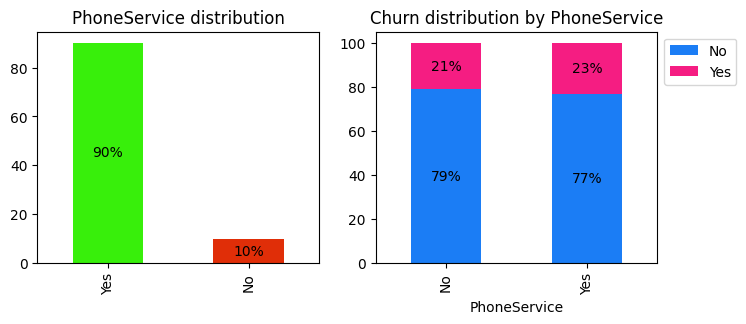

In [31]:
explore_variable(list(df.columns)[6])

MultipleLines
<class 'str'>    6419
Name: MultipleLines, dtype: int64


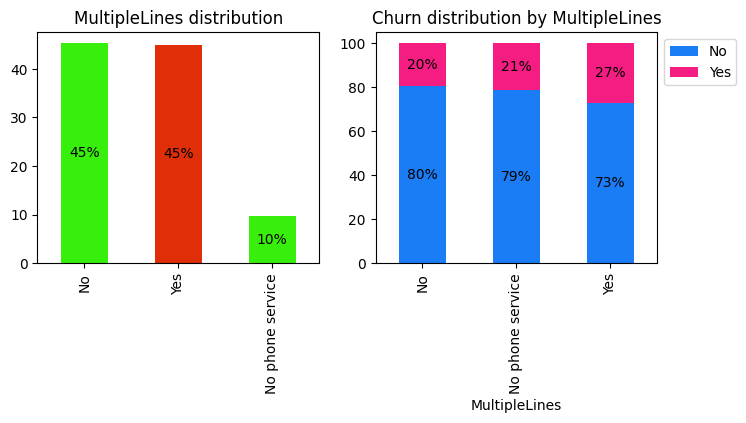

In [32]:
explore_variable(list(df.columns)[7])

InternetService
<class 'str'>    6419
Name: InternetService, dtype: int64


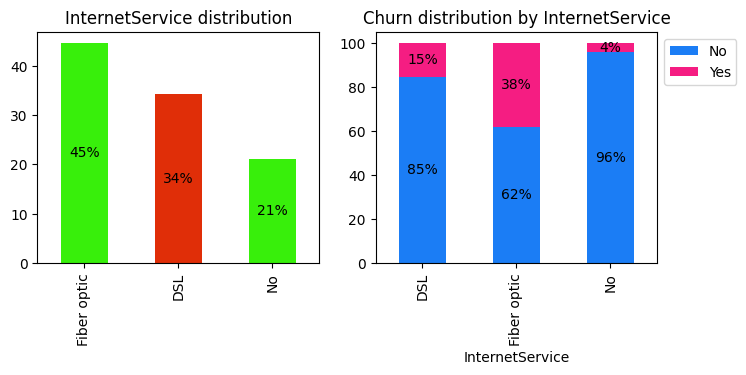

In [33]:
explore_variable(list(df.columns)[8])

OnlineSecurity
<class 'str'>    6419
Name: OnlineSecurity, dtype: int64


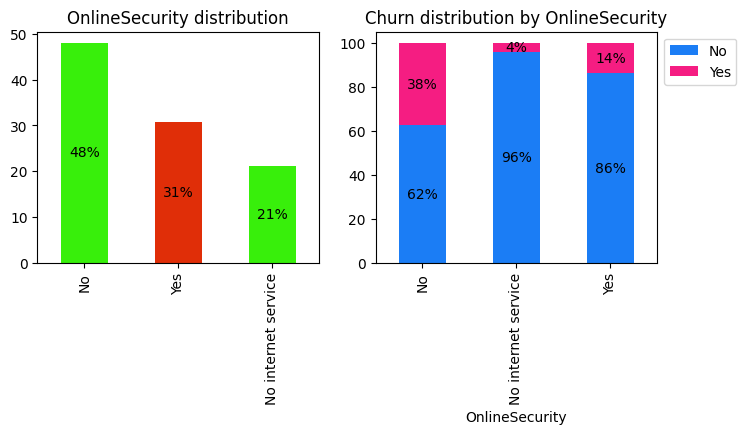

In [34]:
explore_variable(list(df.columns)[9])

OnlineBackup
<class 'str'>    6419
Name: OnlineBackup, dtype: int64


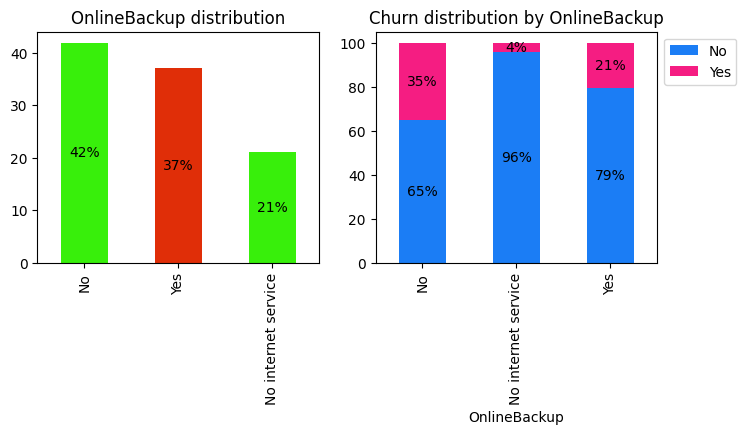

In [35]:
explore_variable(list(df.columns)[10])

DeviceProtection
<class 'str'>    6419
Name: DeviceProtection, dtype: int64


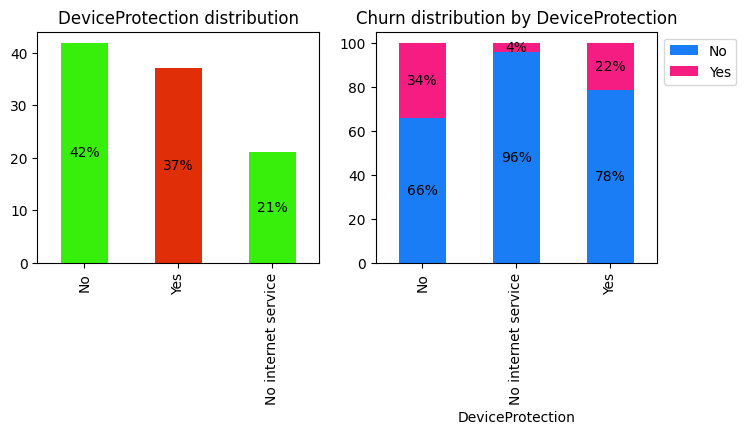

In [36]:
explore_variable(list(df.columns)[11])

TechSupport
<class 'str'>    6419
Name: TechSupport, dtype: int64


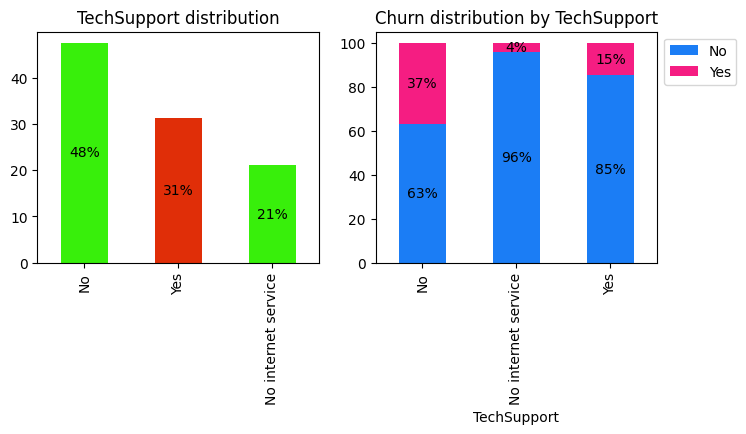

In [38]:
explore_variable(list(df.columns)[12])

StreamingTV
<class 'str'>    6419
Name: StreamingTV, dtype: int64


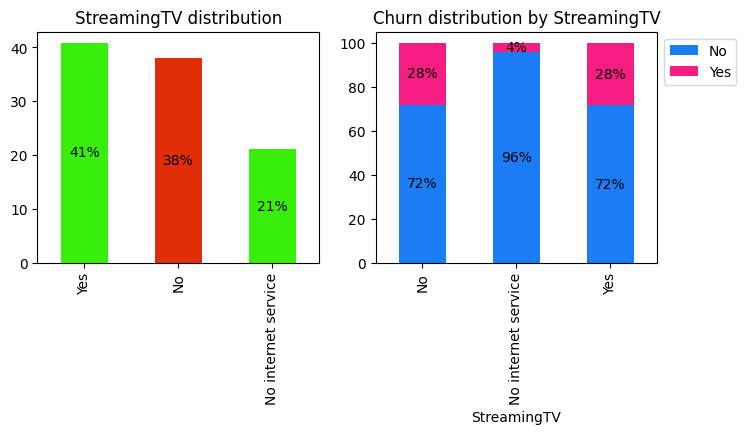

In [39]:
explore_variable(list(df.columns)[13])

StreamingMovies
<class 'str'>    6419
Name: StreamingMovies, dtype: int64


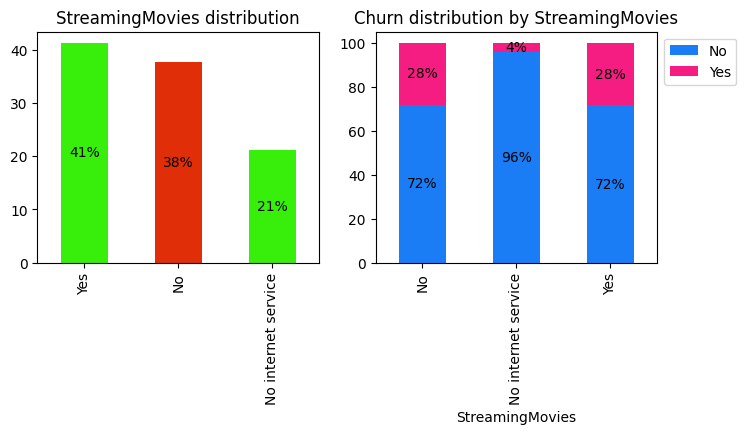

In [41]:
explore_variable(list(df.columns)[14])

Contract
<class 'str'>    6419
Name: Contract, dtype: int64


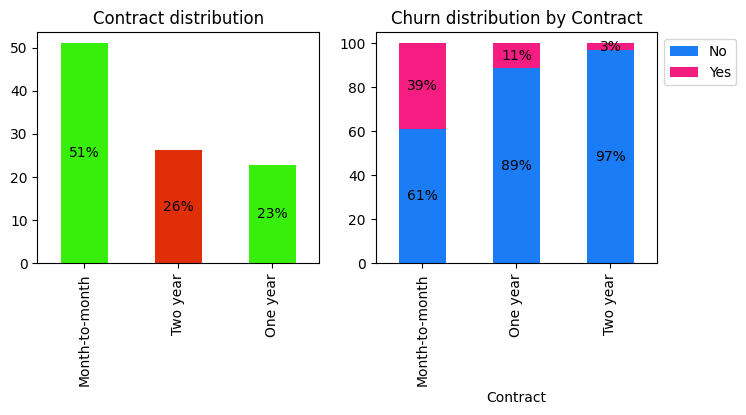

In [42]:
explore_variable(list(df.columns)[15])

PaperlessBilling
<class 'str'>    6419
Name: PaperlessBilling, dtype: int64


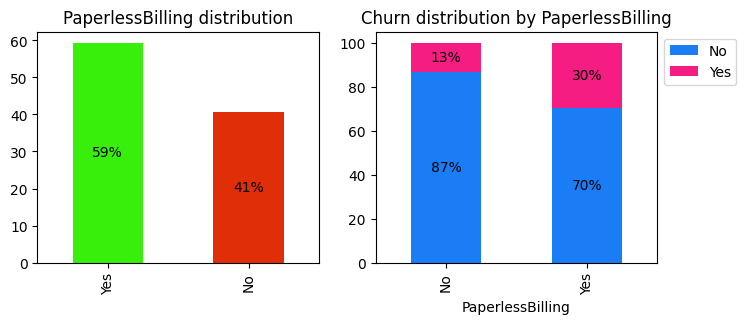

In [43]:
explore_variable(list(df.columns)[16])

PaymentMethod
<class 'str'>    6419
Name: PaymentMethod, dtype: int64


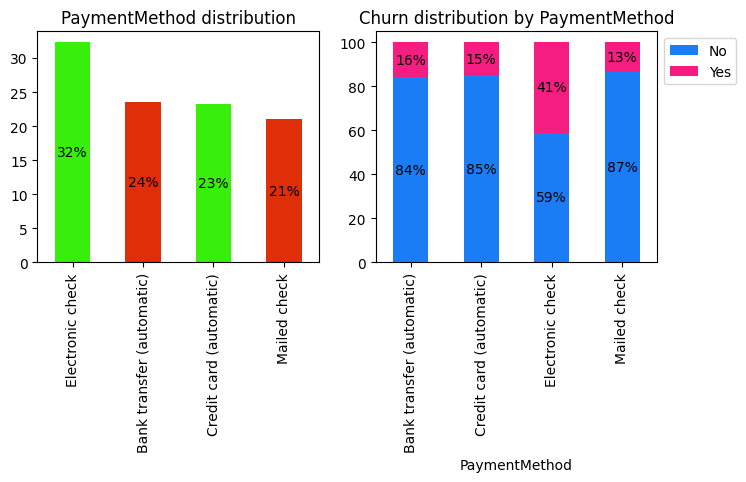

In [44]:
explore_variable(list(df.columns)[17])

MonthlyCharges


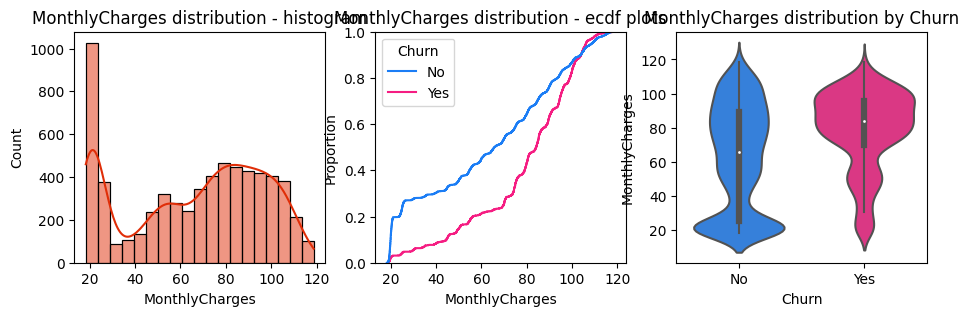

In [45]:
explore_variable(list(df.columns)[18])

TotalCharges


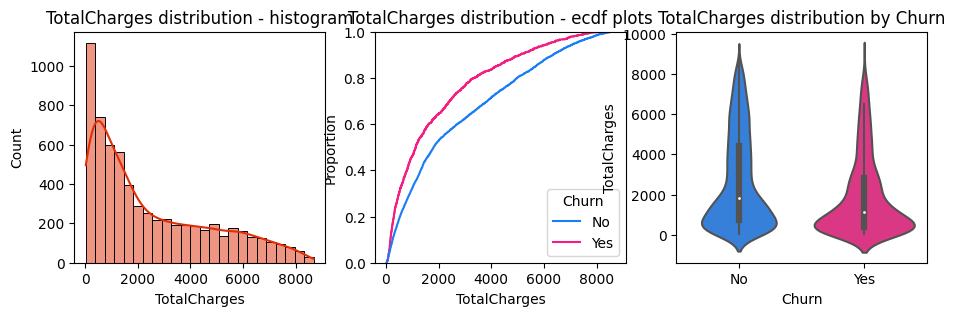

In [46]:
explore_variable(list(df.columns)[19])

Churn
<class 'str'>    6419
Name: Churn, dtype: int64


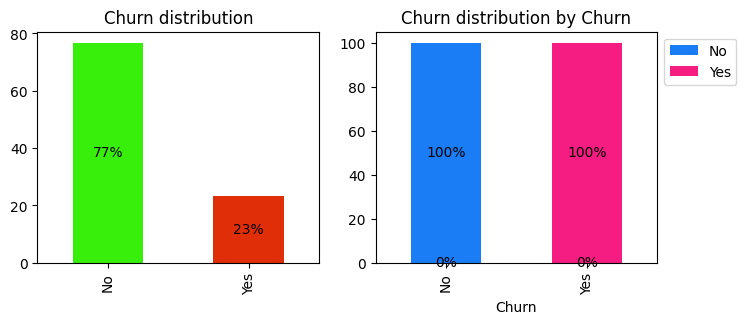

In [47]:
explore_variable(list(df.columns)[20])

In [49]:
list_of_numerics=df.select_dtypes(include=['float','int']).columns

possible_out = df.apply(lambda x: sum(
    (x < (x.quantile(0.25) - 1.5 * (x.quantile(0.75)- x.quantile(0.25))))|
    (x > (x.quantile(0.75) + 1.5 * (x.quantile(0.75)- x.quantile(0.25))))
) if x.name in list_of_numerics else '')

possible_out = pd.DataFrame({'NPO': possible_out})
possible_out

,NPO
customerID,
gender,
SeniorCitizen,
Partner,
Dependents,
tenure,0
PhoneService,
MultipleLines,
InternetService,
OnlineSecurity,


In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
scaler = MinMaxScaler(feature_range=(0,1))


scaledEncodedData = df.apply(le.fit_transform)

scaledEncodedData[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(scaledEncodedData[['tenure', 'MonthlyCharges', 'TotalCharges']])


scaledEncodedData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3605,1,0,0,0,0.457143,1,0,0,2,...,2,0,0,0,1,0,3,0.309554,0.531300,0
2,2334,1,0,0,0,0.000000,1,0,0,2,...,0,0,0,0,0,1,3,0.270701,0.033075,1
3,5040,1,0,0,0,0.614286,0,1,0,2,...,2,2,0,0,1,0,0,0.166879,0.522588,0
4,5931,0,0,0,0,0.000000,1,0,1,0,...,0,0,0,0,0,1,2,0.456051,0.055340,1
5,5966,0,0,0,0,0.085714,1,2,1,0,...,2,0,2,2,0,1,2,0.802548,0.297193,1


C:\Users\Hemanth\AppData\Local\Temp\ipykernel_26516\3462439806.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


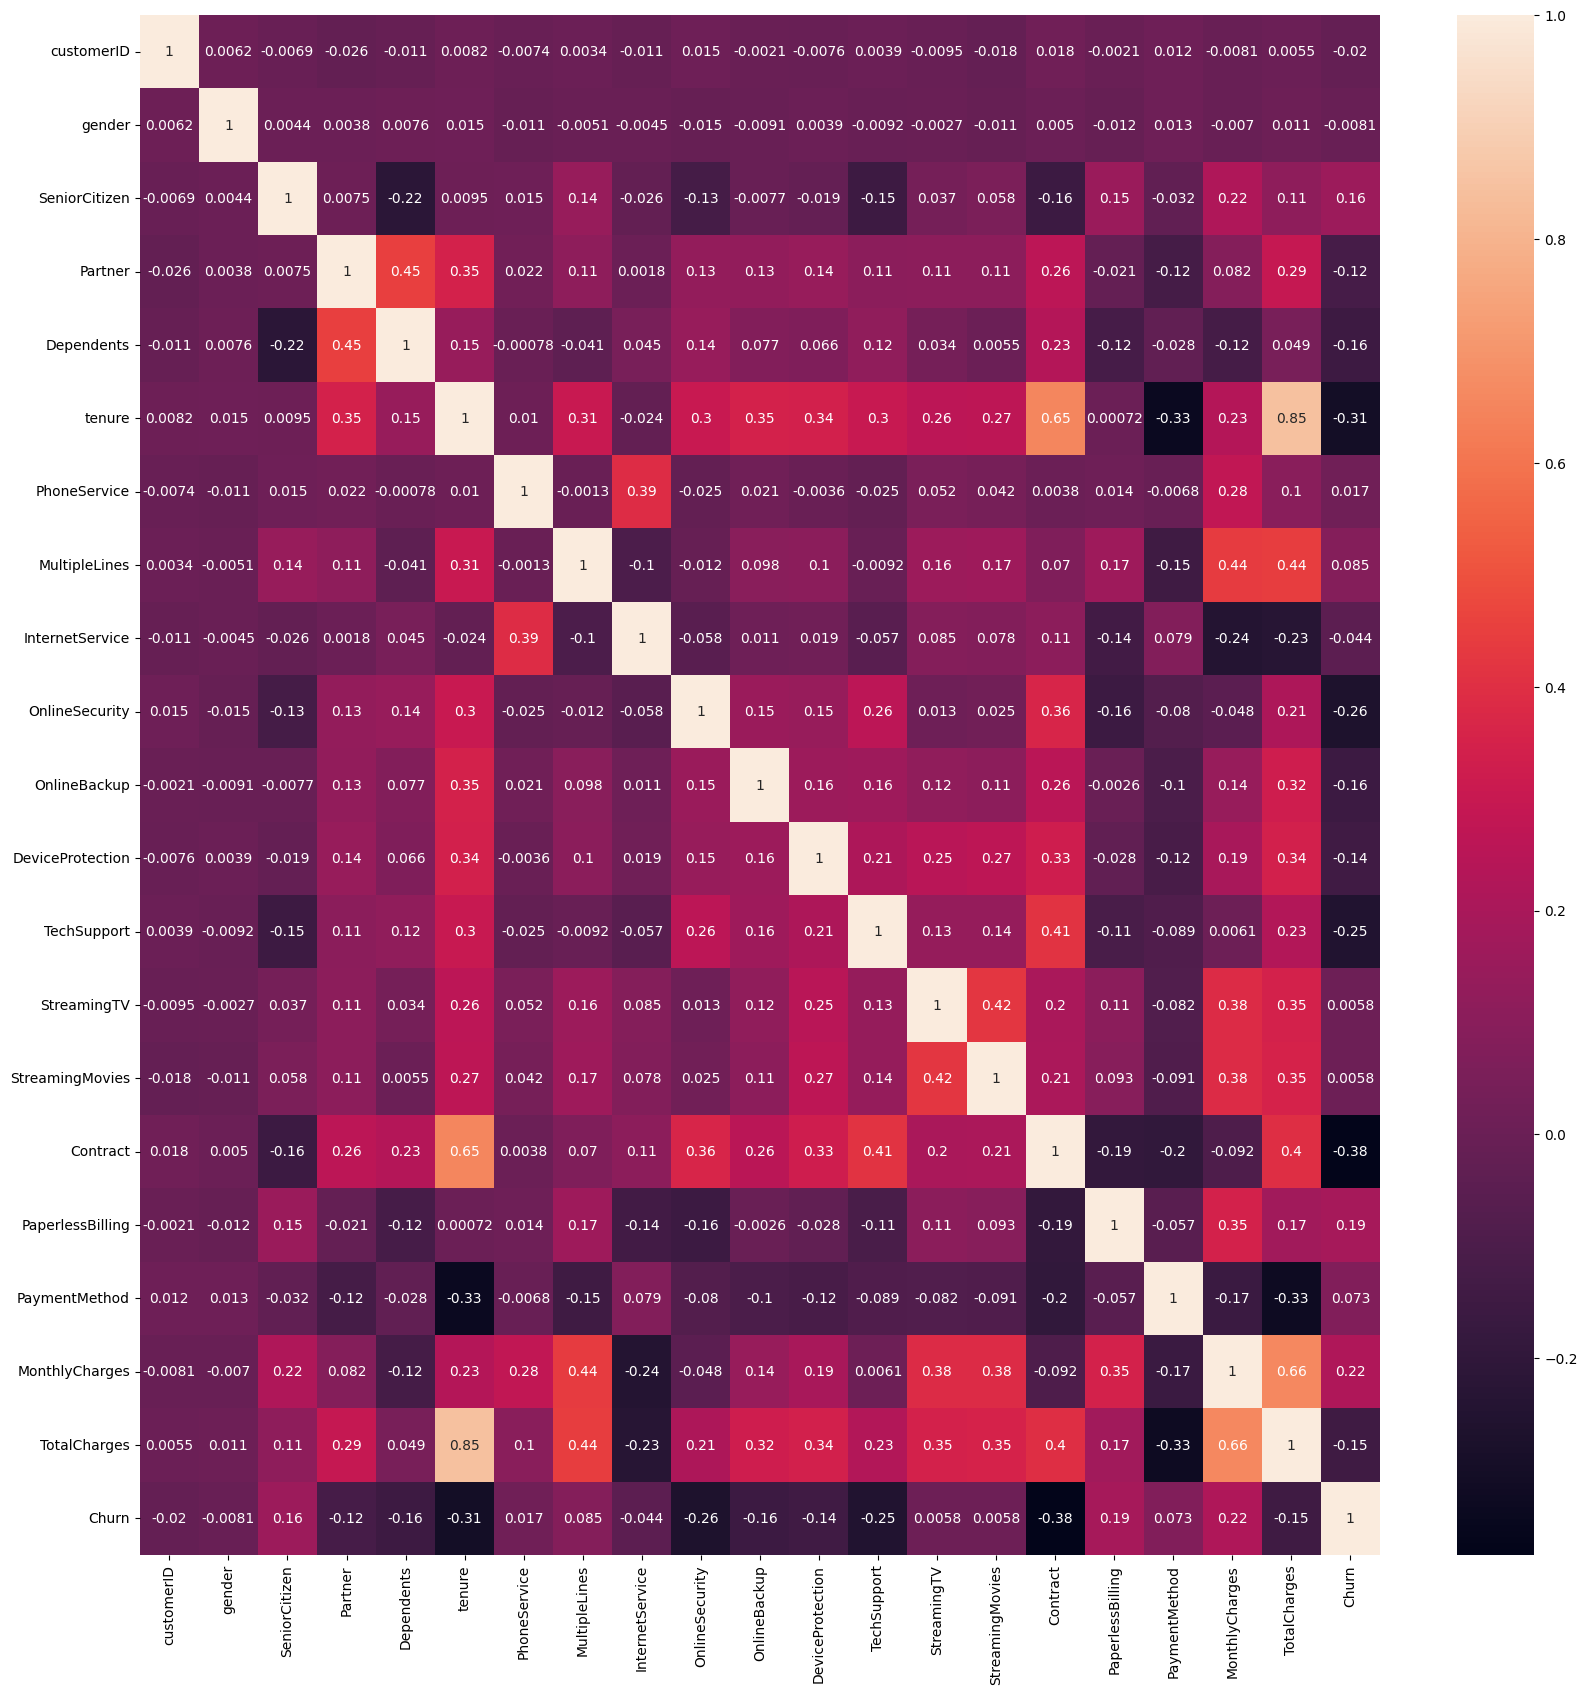

In [66]:
corr_matrix = scaledEncodedData.corr()
f = plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot= True)

f.show()

In [4]:
dummyData = pd.get_dummies(df.drop(['Churn'], axis=1))
dummyData = pd.concat([dummyData, df.loc[:, ['Churn']]], axis = 1)
df['Churn'] = np.where((df.Churn == 'No'), 0, df.Churn)
df['Churn'] = np.where((df.Churn == 'Yes'), 1, df.Churn)
dummyData['Churn'] = df['Churn'].astype('uint8')

plt.figure(figsize=(15,8))
dummyData.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [50]:
df['Churn'].value_counts()

No     4930
Yes    1489
Name: Churn, dtype: int64

In [51]:
from sklearn import preprocessing
enc= preprocessing.LabelEncoder()
df['Churn']= enc.fit_transform(df['Churn'])

In [52]:
df['Churn'].value_counts()

0    4930
1    1489
Name: Churn, dtype: int64

In [53]:
df2=pd.get_dummies(df.drop("customerID", axis=1), drop_first=True)

In [54]:
X= df2.drop("Churn", axis=1)
y= df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [55]:
train = pd.concat([X_train, y_train], axis=1)

minority_class = train[train["Churn"] == 1]
majority_class = train[train["Churn"] == 0]


upsampled_minority = resample(minority_class,
                              replace=True,
                              n_samples=len(majority_class),
                              random_state=42)

trainb = pd.concat([majority_class, upsampled_minority])
trainb = trainb.reset_index(drop=True)


X_trainb=trainb.drop('Churn', axis=1)
y_trainb=trainb['Churn']

In [56]:
pipe = make_pipeline(StandardScaler(), LogisticRegression()) # pipeline enables to chain transformers and estimator
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       986
           1       0.63      0.45      0.52       298

    accuracy                           0.81      1284
   macro avg       0.74      0.68      0.70      1284
weighted avg       0.80      0.81      0.80      1284



In [57]:
rf= RandomForestClassifier(random_state=42)

pg_rf={'n_estimators': [20,40,120],'max_depth': [5,10,15,30]} #n_estimators parameter= number of trees

gs_rf=GridSearchCV(estimator= rf,
               param_grid= pg_rf,
               scoring='f1',
               cv=2)

# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_rf_scores = cross_val_score(gs_rf, X=X_train, y=y_train, cv=5,scoring='f1', n_jobs=-1)

# fit, and fit with best estimator
gs_rf.fit(X_train, y_train)
gs_rf_best=gs_rf.best_estimator_
gs_rf.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=40, random_state=42)

In [58]:
gs_rf_best.fit(X_train, y_train)
y_pred = gs_rf_best.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       986
           1       0.64      0.44      0.52       298

    accuracy                           0.81      1284
   macro avg       0.74      0.68      0.70      1284
weighted avg       0.80      0.81      0.80      1284



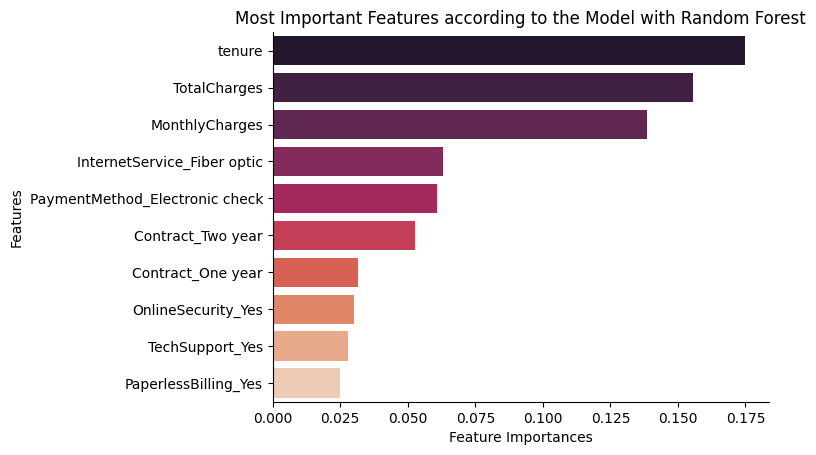

In [59]:
# using random forest here to get feature importances
importances= gs_rf_best.feature_importances_
feature_importances= pd.Series(importances, index=X_trainb.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10], palette="rocket")
sns.despine()
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.title("Most Important Features according to the Model with Random Forest")
plt.show()